In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network(layer_sizes):
    """
    Plots a neural network diagram.

    Args:
    layer_sizes (list): List containing the number of neurons in each layer.
    """
    G = nx.DiGraph()
    pos = {}
    labels = {}

    # Add nodes
    for i, layer_size in enumerate(layer_sizes):
        layer_pos = i
        for j in range(layer_size):
            node_pos = j - (layer_size - 1) / 2
            G.add_node((i, j), pos=(layer_pos, node_pos))
            labels[(i, j)] = f"{i},{j}"

    # Add edges
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                G.add_edge((i, j), (i+1, k))

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color='lightblue', font_size=8, font_color='black', arrows=True, arrowsize=10, arrowstyle='->')

    plt.title("Neural Network Diagram")
    plt.show()


Cost after iteration 0: 0.693148080871083
Cost after iteration 1000: 0.6931471801461606
Cost after iteration 2000: 0.693147180137917
Cost after iteration 3000: 0.6931471801295449
Cost after iteration 4000: 0.6931471801210409
Cost after iteration 5000: 0.6931471801124021
Cost after iteration 6000: 0.6931471801036249
Cost after iteration 7000: 0.6931471800947061
Cost after iteration 8000: 0.693147180085642
Cost after iteration 9000: 0.6931471800764292


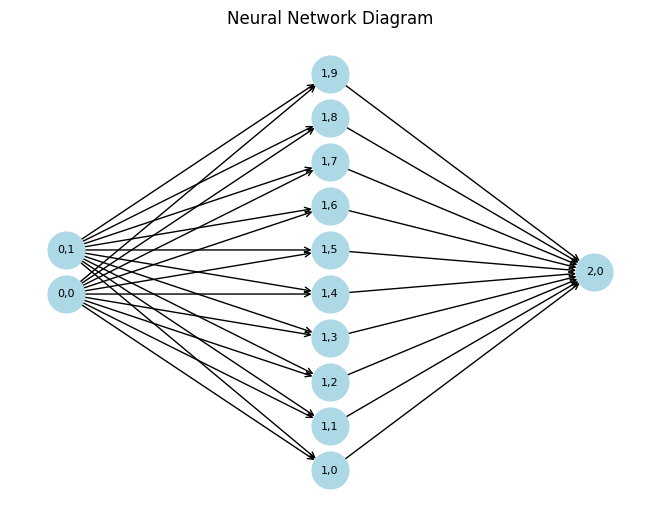

Predictions: [[ True False  True False]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(1)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    cost = np.squeeze(cost)
    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

def model(X, Y, hidden_size, num_iterations=10000, learning_rate=1.2):
    np.random.seed(3)
    input_size = X.shape[0]
    output_size = Y.shape[0]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters

def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

def plot_neural_network(layer_sizes):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    for i, layer_size in enumerate(layer_sizes):
        layer_pos = i
        for j in range(layer_size):
            node_pos = j - (layer_size - 1) / 2
            G.add_node((i, j), pos=(layer_pos, node_pos))
            labels[(i, j)] = f"{i},{j}"

    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                G.add_edge((i, j), (i+1, k))

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color='lightblue', font_size=8, font_color='black', arrows=True, arrowsize=10, arrowstyle='->')

    plt.title("Neural Network Diagram")
    plt.show()

# Example data
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # Inputs
Y = np.array([[0, 1, 1, 0]])  # XOR outputs

# Train the model
parameters = model(X, Y, hidden_size=4, num_iterations=10000, learning_rate=1.2)

# Plot the network structure
plot_neural_network([2, 10, 1])

# Make predictions
predictions = predict(parameters, X)
print(f"Predictions: {predictions}")


Cost after iteration 0: 0.6931501403450192
Cost after iteration 1000: 0.6931471843145542
Cost after iteration 2000: 0.6931471842625551
Cost after iteration 3000: 0.6931471842112313
Cost after iteration 4000: 0.6931471841605722
Cost after iteration 5000: 0.6931471841105674
Cost after iteration 6000: 0.6931471840612065
Cost after iteration 7000: 0.6931471840124795
Cost after iteration 8000: 0.6931471839643768
Cost after iteration 9000: 0.6931471839168883


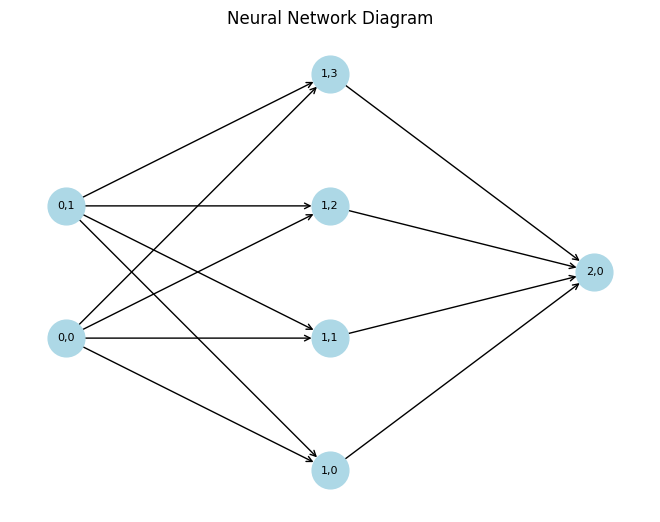

Predictions: [[ True False  True False]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Initialize Parameters
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(1)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

# Activation Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Forward Propagation
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

# Compute Cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    cost = np.squeeze(cost)
    return cost

# Backward Propagation
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

# Update Parameters
def update_parameters(parameters, grads, learning_rate=0.1):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

# Model Training
def model(X, Y, hidden_size, num_iterations=10000, learning_rate=0.1):
    np.random.seed(3)
    input_size = X.shape[0]
    output_size = Y.shape[0]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters

# Make Predictions
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

# Plot Neural Network
def plot_neural_network(layer_sizes):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    for i, layer_size in enumerate(layer_sizes):
        layer_pos = i
        for j in range(layer_size):
            node_pos = j - (layer_size - 1) / 2
            G.add_node((i, j), pos=(layer_pos, node_pos))
            labels[(i, j)] = f"{i},{j}"

    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                G.add_edge((i, j), (i+1, k))

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color='lightblue', font_size=8, font_color='black', arrows=True, arrowsize=10, arrowstyle='->')

    plt.title("Neural Network Diagram")
    plt.show()

# Example Data
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # Inputs
Y = np.array([[0, 1, 1, 0]])  # XOR outputs

# Train the Model
parameters = model(X, Y, hidden_size=100, num_iterations=10000, learning_rate=0.1)

# Plot the Network Structure
plot_neural_network([2, 4, 1])

# Make Predictions
predictions = predict(parameters, X)
print(f"Predictions: {predictions}")


Cost after iteration 0: 0.694320
Cost after iteration 1000: 0.006460
Cost after iteration 2000: 0.002784
Cost after iteration 3000: 0.001747
Cost after iteration 4000: 0.001265
Cost after iteration 5000: 0.000988
Cost after iteration 6000: 0.000808
Cost after iteration 7000: 0.000683
Cost after iteration 8000: 0.000590
Cost after iteration 9000: 0.000519


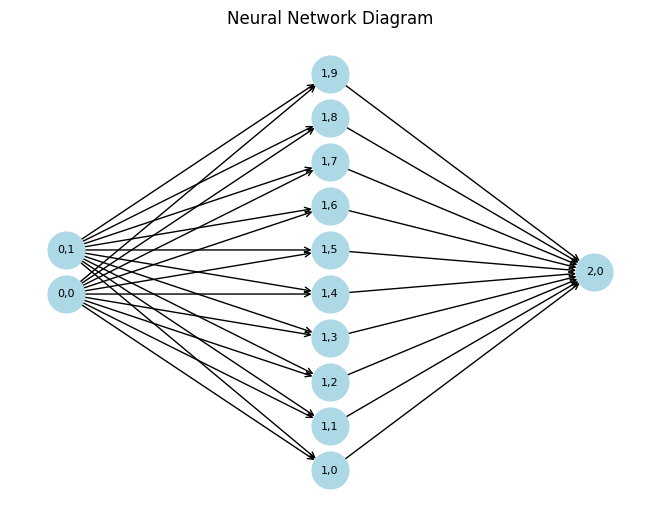

Predictions: [[False  True  True False]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Initialize Parameters
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(1)
    W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2 / input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2 / hidden_size)
    b2 = np.zeros((output_size, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

# Activation Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

# Forward Propagation
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

# Compute Cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    cost = np.squeeze(cost)
    return cost

# Backward Propagation
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

# Update Parameters
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

# Model Training
def model(X, Y, hidden_size, num_iterations=10000, learning_rate=1.2):
    np.random.seed(3)
    input_size = X.shape[0]
    output_size = Y.shape[0]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")

    return parameters

# Make Predictions
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

# Plot Neural Network
def plot_neural_network(layer_sizes):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    for i, layer_size in enumerate(layer_sizes):
        layer_pos = i
        for j in range(layer_size):
            node_pos = j - (layer_size - 1) / 2
            G.add_node((i, j), pos=(layer_pos, node_pos))
            labels[(i, j)] = f"{i},{j}"

    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                G.add_edge((i, j), (i+1, k))

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color='lightblue', font_size=8, font_color='black', arrows=True, arrowsize=10, arrowstyle='->')

    plt.title("Neural Network Diagram")
    plt.show()

# Example Data
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # Inputs
Y = np.array([[0, 1, 1, 0]])  # XOR outputs

# Train the Model
parameters = model(X, Y, hidden_size=10, num_iterations=10000, learning_rate=1.2)

# Plot the Network Structure
plot_neural_network([2, 10, 1])

# Make Predictions
predictions = predict(parameters, X)
print(f"Predictions: {predictions}")
